In [1]:
import tensorstore as ts
import numpy as np
import matplotlib.pyplot as plt

In [35]:
src_future = ts.open({
    "driver": "neuroglancer_precomputed",
    "kvstore": "s3://bossdb-open-data/kuan_phelps2020/drosophila_leg_75nm/190515_merged_fullres",
    # Use 500MB in-memory cache.
    "context": {
        "cache_pool": {
            "total_bytes_limit": 500_000_000
        }
    },
    "recheck_cached_data": "open",
})
src = src_future.result()

In [36]:
src

TensorStore({
  'context': {
    'aws_credentials': {
      'filename': '',
      'metadata_endpoint': '',
      'profile': '',
    },
    'cache_pool': {'total_bytes_limit': 500000000},
    'data_copy_concurrency': {},
    's3_request_concurrency': {},
    's3_request_retries': {},
  },
  'driver': 'neuroglancer_precomputed',
  'dtype': 'uint8',
  'kvstore': {
    'bucket': 'bossdb-open-data',
    'driver': 's3',
    'path': 'kuan_phelps2020/drosophila_leg_75nm/190515_merged_fullres/',
  },
  'multiscale_metadata': {'num_channels': 1, 'type': 'image'},
  'recheck_cached_data': 'open',
  'scale_index': 0,
  'scale_metadata': {
    'chunk_size': [512, 512, 16],
    'encoding': 'raw',
    'key': '75.0_75.0_75.0',
    'resolution': [75.0, 75.0, 75.0],
    'sharding': None,
    'size': [11776, 6144, 7856],
    'voxel_offset': [0, 0, 0],
  },
  'transform': {
    'input_exclusive_max': [11776, 6144, 7856, 1],
    'input_inclusive_min': [0, 0, 0, 0],
    'input_labels': ['x', 'y', 'z', 'chan

In [25]:
dataset_future = ts.open({
    "driver": "n5",
    "kvstore": {
        "driver": "file",
        "path": "/home/katzw/bossdb-convert/kuan_phelps2020_leg.n5",
    },
    # Use 100MB in-memory cache.
    "context": {
        "cache_pool": {
            "total_bytes_limit": 100_000_000
        }
    },
    "recheck_cached_data": "open",
})
dataset = dataset_future.result()

In [26]:
dataset

TensorStore({
  'context': {
    'cache_pool': {'total_bytes_limit': 100000000},
    'data_copy_concurrency': {},
    'file_io_concurrency': {},
    'file_io_locking': {},
    'file_io_memmap': False,
    'file_io_sync': True,
  },
  'driver': 'n5',
  'dtype': 'uint8',
  'kvstore': {
    'driver': 'file',
    'path': '/home/katzw/bossdb-convert/kuan_phelps2020_leg.n5/',
  },
  'metadata': {
    'blockSize': [256, 256, 256],
    'compression': {'level': -1, 'type': 'gzip', 'useZlib': False},
    'dataType': 'uint8',
    'dimensions': [11776, 6144, 7856],
  },
  'recheck_cached_data': 'open',
  'transform': {
    'input_exclusive_max': [[11776], [6144], [7856]],
    'input_inclusive_min': [0, 0, 0],
  },
})

In [29]:
dataset.shape

(11776, 6144, 7856)

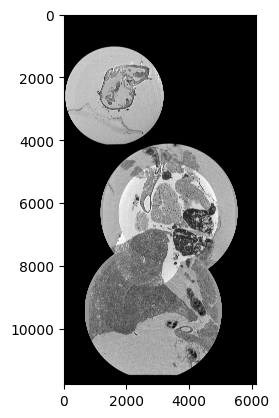

In [40]:
slice = dataset[:, :, 2303]
plt.imshow(slice, cmap='gray')

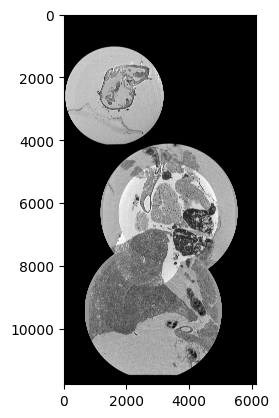

In [41]:
src_slice = src[:, :, 2303]
plt.imshow(src_slice, cmap='gray')

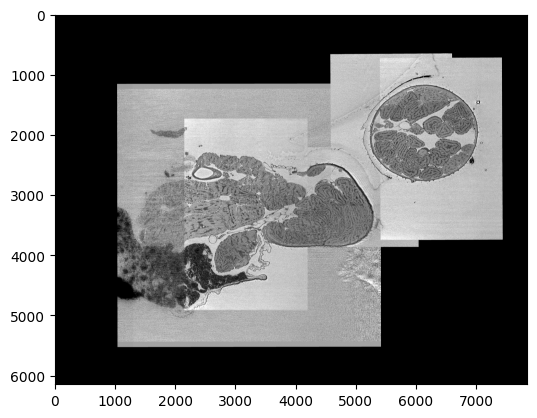

In [48]:
slice = dataset[6301, :, :]  
plt.imshow(slice, cmap='gray')

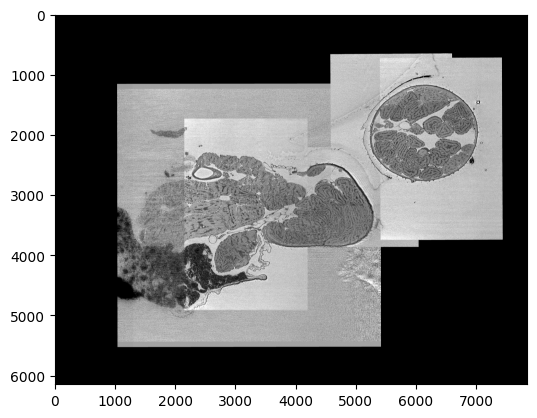

In [50]:
slice = src[6301, :, :]  
plt.imshow(slice, cmap='gray')

In [ ]:
z_slices = range(0, 7800, 100)

# Determine the number of rows and columns for the subplot grid
n_cols = 5
n_rows = (len(z_slices) + n_cols - 1) // n_cols  # Ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows))

for i, z in enumerate(z_slices):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]
    slice = dataset[z, :, :]
    ax.imshow(slice, cmap='gray')
    ax.set_title(f'z = {z}')
    ax.axis('off')

# Hide any unused subplots
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

In [1]:
# The above is likely an issue between tensorstore writing in XYZ while bossdb is in ZYX.